In [25]:
import tensorflow as tf

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data=pd.read_csv("concrete_data.csv")

In [28]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [29]:
np_df=data.to_numpy()
np_df

array([[540.  ,   0.  ,   0.  , ..., 676.  ,  28.  ,  79.99],
       [540.  ,   0.  ,   0.  , ..., 676.  ,  28.  ,  61.89],
       [332.5 , 142.5 ,   0.  , ..., 594.  , 270.  ,  40.27],
       ...,
       [148.5 , 139.4 , 108.6 , ..., 780.  ,  28.  ,  23.7 ],
       [159.1 , 186.7 ,   0.  , ..., 788.9 ,  28.  ,  32.77],
       [260.9 , 100.5 ,  78.3 , ..., 761.5 ,  28.  ,  32.4 ]])

In [30]:
x_data=np_df[:,0:8]

In [31]:
x_data

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [32]:
y_data=np_df[:,-1]

In [33]:
y_data

array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ])

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [35]:
x_data=sc.fit_transform(x_data)

In [36]:
x_data

array([[ 2.47791487, -0.85688789, -0.84714393, ...,  0.86315424,
        -1.21767004, -0.27973311],
       [ 2.47791487, -0.85688789, -0.84714393, ...,  1.05616419,
        -1.21767004, -0.27973311],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -0.52651741,
        -2.24091709,  3.55306569],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ..., -1.03606368,
         0.0801067 , -0.27973311],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.21464081,
         0.19116644, -0.27973311],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -1.39506219,
        -0.15074782, -0.27973311]])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,train_size=0.8,random_state=42)

In [39]:
from tensorflow import keras

In [40]:
model=tf.keras.models.Sequential()

In [42]:
#add first input layer
model.add(keras.layers.Dense(128,input_shape=(8,),activation='relu'))
#add hidden layers
model.add(keras.layers.Dense(128,activation='relu'))
#add out layer
model.add(keras.layers.Dense(1,activation='relu'))
#compile the model with loss and metrics
opt=keras.optimizers.Adam(learning_rate=0.01,beta_1=0.9)
model.compile(loss="mean_squared_error",optimizer=opt,metrics=["mean_squared_error"])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,793
Trainable params: 17,793
Non-trainable params: 0
_________________________________________________________________


Epoch 1/18
33/33 [==============================] - 0s 11ms/step - loss: 34.6596 - mean_squared_error: 34.6596 - val_loss: 35.3496 - val_mean_squared_error: 35.3496
Epoch 2/18
33/33 [==============================] - 0s 7ms/step - loss: 33.0708 - mean_squared_error: 33.0708 - val_loss: 31.8615 - val_mean_squared_error: 31.8615
Epoch 3/18
33/33 [==============================] - 0s 7ms/step - loss: 30.4503 - mean_squared_error: 30.4503 - val_loss: 35.6179 - val_mean_squared_error: 35.6179
Epoch 4/18
33/33 [==============================] - 0s 7ms/step - loss: 34.4429 - mean_squared_error: 34.4429 - val_loss: 63.6092 - val_mean_squared_error: 63.6092
Epoch 5/18
33/33 [==============================] - 0s 7ms/step - loss: 39.8577 - mean_squared_error: 39.8577 - val_loss: 38.0696 - val_mean_squared_error: 38.0696
Epoch 6/18
33/33 [==============================] - 0s 7ms/step - loss: 30.2660 - mean_squared_error: 30.2660 - val_loss: 40.0535 - val_mean_squared_error: 40.0535
Epoch 7/18
33/3

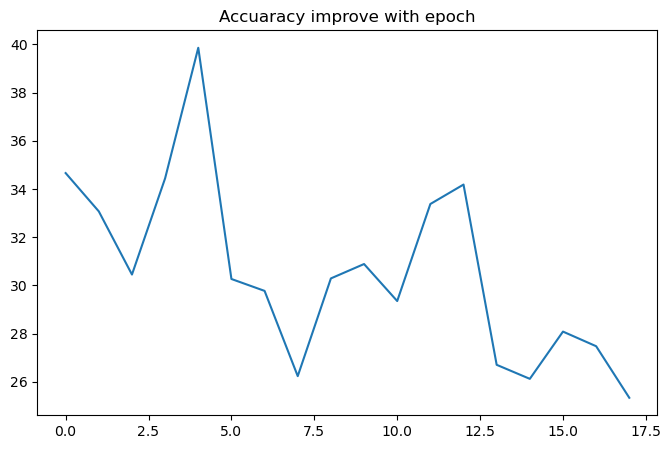

7/7 [==============================] - 0s 5ms/step - loss: 43.2560 - mean_squared_error: 43.2560


[43.25602340698242, 43.25602340698242]

In [46]:
history=model.fit(xtrain,ytrain,batch_size=20,epochs=18,verbose=1,validation_split=0.2)
pd.DataFrame(history.history)["mean_squared_error"].plot(figsize=(8,5))
plt.title('Accuaracy improve with epoch')
plt.show()
model.evaluate(xtest,ytest)                              


In [47]:
#predictions
prediction_input=[[540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28]]

#scale the prediction_input
scale_input=sc.fit_transform(prediction_input)

#prediction the output
raw_predictions=model.predict(scale_input)

print("Raw Predict output(probablities):",raw_predictions)


1/1 [==============================] - 0s 40ms/step
Raw Predict output(probablities): [[51.403873]]
